<a href="https://colab.research.google.com/github/bsudharshan2001/bsudharshan2001/blob/main/College/Semester-5/19CSE305-MachineLearning/MLProject/ML-Project_SVM/LR-Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machines and Linear Regression
---
--------------

In [1]:
import cv2
import numpy as np
import pandas as pd
import os
import cv2
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/ML Project/archive_6/boneage-training-dataset.csv')
df.head()

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


In [7]:
def extract_features(path):

  # using cv2 to read the image from the specified path
  original = cv2.imread(path)

  # check to verify if the path is valid and the image is correctly read
  if original is not None:

    # resizing the original image
    original = cv2.resize(original,(32,32))

    # converting the original image to gray scale
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

    # applying Gaussian Blur filter to reduce noise in the image
    original_blur = cv2.GaussianBlur(original_gray, (3,3), 0)

    # applying Sobel Edge Detection filter
    # for feature extraction
    sobelx = cv2.Sobel(src=original_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
    sobely = cv2.Sobel(src=original_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) 
    sobelxy = cv2.Sobel(src=original_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

    # converting the edge extracted image into to a numpy array
    arr = np.array(sobelxy)

    # reshaping the numpy array to 1D array
    arr = arr.reshape(32*32)

    # return the final numpy 1D array
    return arr

In [8]:
# list to store the final data after feature extraction
final_data = []

path = '/content/drive/MyDrive/Train'
os.chdir(path)

images = os.listdir()

# for each image in the directory
for x in os.listdir():

  # get the label of that image
  label = x.split('.')[0]

  final_path = path +'/'+x

  # extract the features of that paticular image
  features = list(extract_features(final_path))

  # store the features and label in a list and append it to final_data
  data = [int(label), *features]
  final_data.append(data)

  print(data)

# at the end of the cell, final_data has all the feature of each image in the directory

[11572, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 60.0, 60.0, 25.0, 11.0, 19.0, 19.0, 8.0, 1.0, 0.0, -1.0, -3.0, 0.0, 8.0, 6.0, -5.0, -5.0, 3.0, 2.0, -5.0, -4.0, 6.0, 11.0, 6.0, 2.0, -4.0, -27.0, -57.0, -61.0, -24.0, 11.0, 0.0, 0.0, 50.0, 56.0, 34.0, 21.0, 23.0, 23.0, 12.0, 0.0, -3.0, -4.0, -9.0, -5.0, 8.0, 6.0, -5.0, 2.0, 16.0, 14.0, 3.0, -1.0, 3.0, 3.0, -3.0, -3.0, -7.0, -30.0, -55.0, -57.0, -23.0, 12.0, 0.0, 0.0, 13.0, 34.0, 43.0, 27.0, 12.0, 11.0, 5.0, -6.0, -8.0, -8.0, -11.0, 0.0, 19.0, 12.0, -11.0, -11.0, 8.0, 18.0, 13.0, 6.0, 2.0, -4.0, -7.0, -5.0, -12.0, -23.0, -22.0, -16.0, -6.0, 5.0, 0.0, 0.0, 6.0, 30.0, 42.0, 20.0, -3.0, -7.0, -7.0, -7.0, -6.0, -8.0, -5.0, 26.0, 73.0, 60.0, -29.0, -85.0, -45.0, 16.0, 25.0, 0.0, -19.0, -17.0, 2.0, 11.0, -5.0, -15.0, -2.0, 8.0, 8.0, 7.0, 0.0, 0.0, 9.0, 15.0, 16.0, 5.0, -8.0, -11.0, -7.0, -1.0, 8.0, 16.0, 13.0, 43.0, 137.0,

In [9]:
# converting the final_data list to a DataFrame 
df1   = pd.DataFrame(final_data)

# renaming first column to id
df1 = df1.rename(columns={0:'id'})
df1.head()

,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,11572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,25.0,11.0,19.0,19.0,...,-34.0,-13.0,-4.0,27.0,71.0,83.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,-57.0,-94.0,-91.0,-85.0,-84.0,...,6.0,0.0,-7.0,-11.0,-9.0,-1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,175.0,351.0,409.0,112.0,-316.0,...,-12.0,-1.0,23.0,25.0,19.0,39.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.0,-15.0,-5.0,4.0,2.0,2.0,...,17.0,16.0,9.0,7.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-303.0,-466.0,-337.0,-125.0,-46.0,-29.0,...,2.0,-3.0,-3.0,-1.0,0.0,-2.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
final = df.merge(df1,on='id')
final.head()

,id,boneage,male,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,1377,180,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,129.0,190.0,-10.0,...,-12.0,2.0,5.0,-7.0,-13.0,-12.0,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1378,12,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,7.0,...,10.0,43.0,74.0,58.0,12.0,-18.0,-17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1379,94,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-26.0,-57.0,-71.0,-59.0,...,20.0,58.0,108.0,118.0,79.0,35.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1380,120,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,170.0,33.0,-169.0,...,5.0,-7.0,-11.0,-16.0,-21.0,-7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1381,82,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,9.0,1.0,-6.0,...,16.0,7.0,1.0,3.0,7.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Outlier Removal (Just tried) -- Ignore
---
----------

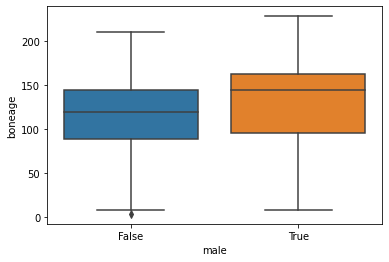

In [11]:
sns.boxplot(y='boneage',x='male',data=final)

In [12]:
q1=final['boneage'].quantile(0.25)
q3=final['boneage'].quantile(0.75)
iqr=q3-q1
print(iqr)

62.0


In [13]:
print((final<(q1-1.5*iqr))|(final>(q3+1.5*iqr)))

       id  boneage   male     1     2     3  ...  1019  1020  1021  1022  1023  1024
0    True    False   True  True  True  True  ...  True  True  True  True  True  True
1    True    False   True  True  True  True  ...  True  True  True  True  True  True
2    True    False   True  True  True  True  ...  True  True  True  True  True  True
3    True    False  False  True  True  True  ...  True  True  True  True  True  True
4    True    False   True  True  True  True  ...  True  True  True  True  True  True
..    ...      ...    ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
495  True    False   True  True  True  True  ...  True  True  True  True  True  True
496  True    False   True  True  True  True  ...  True  True  True  True  True  True
497  True    False   True  True  True  True  ...  True  True  True  True  True  True
498  True    False  False  True  True  True  ...  True  True  True  True  True  True
499  True    False  False  True  True  True  ...  True  True  Tru

In [15]:
path = '/content/drive/MyDrive/ML Project/boneage_csv.csv'
final.to_csv(path)

In [16]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
x = final.drop(columns = ['male','boneage'], axis = 1)
y = final['male']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3,random_state=32)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(350, 1025)
(150, 1025)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(350,)
(150,)


In [ ]:
x_train.head()

,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
102,1840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,-3.0,2.0,4.0,0.0,-3.0,...,11.0,23.0,16.0,16.0,21.0,20.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,1422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,4.0,5.0,-3.0,-9.0,-7.0,...,28.0,3.0,5.0,6.0,-4.0,-8.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,1821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-21.0,-23.0,-5.0,14.0,16.0,...,-197.0,-324.0,-261.0,19.0,266.0,283.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364,9099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,30.0,29.0,46.0,86.0,168.0,...,4.0,-4.0,-5.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269,2147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,115.0,196.0,177.0,78.0,10.0,...,19.0,17.0,6.0,8.0,22.0,28.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_img_path = '/content/drive/MyDrive/Machine_Learning/ML_Project/TestImages/11175.png'

In [36]:
image = cv2.imread(test_img_path)

In [37]:
test_img_features = [int(11175)]
x = list(extract_features(test_img_path))

for i in x:
  test_img_features.append(i)

test_img_features = pd.DataFrame(test_img_features)
test_img_features = test_img_features.transpose()

In [38]:
test_img_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,11175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,23.0,89.0,79.0,-90.0,...,-5.0,-13.0,-27.0,-23.0,-11.0,-7.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
test_img_features.shape

(1, 1025)

SVM Kernels:


*   Linear Kernel
*   Polynomial Kernel
*   Radial Basis Function Kernel

Note: Default will be RBF



SVM Classification
---
------------

In [ ]:
# Linear Kernel
clf = svm.SVC(kernel='linear') 
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predicting the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5133333333333333


Trained Using Linear Kernel

In [ ]:
y_predict = clf.predict(test_img_features)

In [ ]:
y_predict[0]

False

Taking Polynomial for further testing and prediction (Accuracy Score is higher)

In [ ]:
# Polynomial Kernel
clf = svm.SVC(kernel='poly') 
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predicting the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


Trained Using Polynomial Kernel

In [ ]:
y_predict = clf.predict(test_img_features)

In [ ]:
y_predict[0]

False

In [ ]:
#Radial Basis Function Kernel
clf = svm.SVC(kernel='rbf') 
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predicting the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5666666666666667


Trained Using RBF

In [ ]:
y_predict = clf.predict(test_img_features)

In [ ]:
y_predict[0]

True

SVM Regression
---
----------

In [30]:
x_reg = final.drop(columns = ['male','boneage'], axis = 1)
y_reg = final['boneage']

In [31]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg= train_test_split(x_reg, y_reg, test_size = 0.3,random_state=32)

In [32]:
print(x_train_reg.shape)
print(x_test_reg.shape)

(350, 1025)
(150, 1025)


In [33]:
print(y_train_reg.shape)
print(y_test_reg.shape)

(350,)
(150,)


In [34]:
x_train_reg.head()

,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
102,1840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,-3.0,2.0,4.0,0.0,-3.0,...,11.0,23.0,16.0,16.0,21.0,20.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,1422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,4.0,5.0,-3.0,-9.0,-7.0,...,28.0,3.0,5.0,6.0,-4.0,-8.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,1821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-21.0,-23.0,-5.0,14.0,16.0,...,-197.0,-324.0,-261.0,19.0,266.0,283.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364,9099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,30.0,29.0,46.0,86.0,168.0,...,4.0,-4.0,-5.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269,2147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,115.0,196.0,177.0,78.0,10.0,...,19.0,17.0,6.0,8.0,22.0,28.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
test_img_path = '/content/drive/MyDrive/ML Project/archive_6/boneage-test-dataset/boneage-test-dataset/4369.png'

In [40]:
# Polynomial Kernel
clf = svm.SVC(kernel='poly') 
#Train the model using the training sets
clf.fit(x_train_reg, y_train_reg)
#Predicting the response for test dataset
y_pred_reg = clf.predict(x_test_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [41]:
y_predict_reg = clf.predict(test_img_features)

In [43]:
y_predict_reg[0]

156

Bone Health - Ignore (Not completed)
---
----------

In [ ]:
# Compared Using Bone Mineral Density(BMD)